# Análise de Dados de Smartphones

Bem-vindo ao meu projeto de análise de dados de smartphones! Neste notebook, exploraremos um conjunto de dados abrangente que contém informações sobre diversos modelos de smartphones. Esta análise visa extrair insights valiosos sobre o mercado de smartphones, características dos dispositivos e tendências.

## Sobre o Conjunto de Dados

O conjunto de dados que estamos utilizando contém informações detalhadas sobre smartphones, incluindo aspectos como marca, modelo, preço, classificação, recursos de hardware, especificações de tela e muito mais. Composto por um amplo conjunto de colunas, os dados nos oferecem a oportunidade de investigar diversos aspectos relacionados aos smartphones.

## Objetivos da Análise

Meu objetivo principal nesta análise incluem:

1. Identificar as marcas e modelos mais populares no mercado de smartphones.
2. Analisar como os preços variam em relação às especificações técnicas.
3. Investigar a relação entre a classificação dos dispositivos e suas características.
4. Explorar a disponibilidade de recursos como 5G, NFC e carregamento rápido.
5. Comparar diferentes marcas em termos de desempenho de processamento e capacidade de RAM.

## Metodologia

Nossa análise será conduzida em várias etapas bem definidas:

### 1. Exploração e Limpeza dos Dados em Python

Iniciaremos nossa jornada pela análise de dados explorando o conjunto de dados de smartphones em Python. Nesta etapa, examinaremos o conjunto de dados, identificaremos quaisquer inconsistências, valores ausentes ou erros e realizaremos a limpeza necessária para garantir que os dados estejam prontos para análise.

### 2. Utilização dos Serviços AWS S3 e AWS Athena

Aproveitando as capacidades da AWS (Amazon Web Services), utilizaremos o Amazon S3 para armazenar nossos dados. Em seguida, empregaremos o AWS Athena, um serviço de consultas interativas que permite executar consultas SQL diretamente nos dados armazenados no S3.

### 3. Consultas SQL e Visualizações

Com os dados armazenados no AWS S3 e acessíveis por meio do AWS Athena, realizaremos consultas SQL para extrair informações específicas e insights valiosos. Todos os resultados das consultas serão apresentados aqui, neste notebook, para fácil visualização.

### 4. Visualização de Dados

Após cada consulta SQL, iremos além, criando gráficos e visualizações que ilustrarão os resultados. Essas representações visuais ajudarão na compreensão dos dados, tornando as tendências e os padrões mais evidentes.

## Começando a Exploração

Vamos começar nossa jornada analítica explorando os dados e identificando tendências interessantes no mercado de smartphones.

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/smartphone-new-data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Origem dos Dados

Para a realização desta análise de dados sobre smartphones, utilizamos um conjunto de dados disponível no Kaggle. Os dados podem ser encontrados no seguinte link: [Smartphone New Data](https://www.kaggle.com/datasets/abdurrahman22224/smartphone-new-data).

Vamos dar uma olhada nos dados brutos?


In [3]:
smartphones_df = pd.read_csv('smartphone_cleaned_v5.csv')
smartphones_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,6.55,120,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,6.70,120,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN


In [4]:
smartphones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 non-null    float64

Parece que todos os tipos de dados das colunas do conjunto de dados já estão configurados.

No entanto, podemos observar que há muitos dados faltantes em várias colunas. Para avaliar a extensão desse problema, vamos somar os valores ausentes de cada coluna, a fim de obter uma compreensão mais clara da dimensão do problema.

In [5]:
smartphones_df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
resolution                     0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
dtype: int64

Certo, há muitos aspectos a serem corrigidos, mas por enquanto, deixaremos isso de lado e nos concentraremos em uma observação mais detalhada do conjunto de dados.

In [6]:
smartphones_df.head(3)

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,6.70,120,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,6.59,120,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,6.60,90,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0


Pode-se observar que o DataFrame possui 25 colunas. No entanto, devido à limitação dos notebooks, não conseguimos visualizar todas elas. Portanto, utilizaremos uma técnica simples para examinar as colunas restantes.

In [7]:
smartphones_df[['fast_charging_available', 'fast_charging', 'ram_capacity', 'internal_memory']].head()

,fast_charging_available,fast_charging,ram_capacity,internal_memory
0,1,100.0,12.0,256.0
1,1,33.0,6.0,128.0
2,1,15.0,4.0,64.0
3,1,NaN,6.0,128.0
4,1,67.0,6.0,128.0


### Resumindo, as colunas estão configuradas da seguinte forma

1. **brand_name**: Nome da marca do smartphone.
2. **model**: Modelo específico do smartphone.
3. **price**: Preço do smartphone.
4. **rating**: Classificação ou avaliação do smartphone.
5. **has_5g**: Indica se o smartphone possui suporte para 5G (True/False).
6. **has_nfc**: Indica se o smartphone possui NFC (Near Field Communication - True/False).
7. **has_ir_blaster**: Indica se o smartphone possui um emissor infravermelho (True/False).
8. **processor_brand**: Marca do processador do smartphone.
9. **num_cores**: Número de núcleos do processador.
10. **processor_speed**: Velocidade do processador em GHz.
11. **battery_capacity**: Capacidade da bateria em mAh.
12. **fast_charging_available**: Indica se o smartphone suporta carregamento rápido (True/False).
13. **fast_charging**: Velocidade de carregamento rápido.
14. **ram_capacity**: Capacidade da memória RAM em GB.
15. **internal_memory**: Capacidade de armazenamento interno em GB.
16. **screen_size**: Tamanho da tela do smartphone em polegadas.
17. **refresh_rate**: Taxa de atualização da tela.
18. **resolution**: Resolução da tela.
19. **num_rear_cameras**: Número de câmeras traseiras.
20. **num_front_cameras**: Número de câmeras frontais.
21. **os**: Sistema operacional do smartphone.
22. **primary_camera_rear**: Resolução da câmera traseira principal.
23. **primary_camera_front**: Resolução da câmera frontal principal.
24. **extended_memory_available**: Indica se há suporte para expansão de memória externa (True/False).
25. **extended_upto**: Capacidade máxima de expansão de memória externa (quando disponível).


Com isso, podemos começar a considerar a primeira melhoria deste conjunto de dados. Acredito que a análise será mais eficiente se a largura e a altura estiverem em colunas separadas.
por que como vocês podem ver a coluna é um tipo string com ambas as resoluções juntas

In [8]:
smartphones_df['resolution'] = smartphones_df['resolution'].str.replace(' ', '')
smartphones_df[['resolution_width', 'resolution_height']] = smartphones_df['resolution'].str.split('x', expand=True)
smartphones_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,1440 x 3216,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,1080 x 2412,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,1080 x 2408,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,1080 x 2400,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,1080 x 2412,3,1.0,android,108.0,16.0,0,NaN,1080,2412


Ok, não precisamos mais da colunas com as resoluções de tela

In [9]:
smartphones_df = smartphones_df.drop('resolution', axis=1)

In [10]:
smartphones_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


Ok, lembra dos valores faltantes?
Vamos resolve-los agora

Primeiro vamos verificar novamente os dados

In [11]:
smartphones_df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

Agora vamos ver os tipos de cada coluna para termos uma noção do tipo de dado que estamos mexendo

In [12]:
smartphones_df.dtypes

brand_name                    object
model                         object
price                          int64
rating                       float64
has_5g                          bool
has_nfc                         bool
has_ir_blaster                  bool
processor_brand               object
num_cores                    float64
processor_speed              float64
battery_capacity             float64
fast_charging_available        int64
fast_charging                float64
ram_capacity                 float64
internal_memory              float64
screen_size                  float64
refresh_rate                   int64
num_rear_cameras               int64
num_front_cameras            float64
os                            object
primary_camera_rear          float64
primary_camera_front         float64
extended_memory_available      int64
extended_upto                float64
resolution_width              object
resolution_height             object
dtype: object

**num_cores**: Para esta coluna, substituir os valores ausentes por 0 pode ser uma opção aceitável, desde que seja claro que 0 representa a ausência de informações sobre o número de núcleos do processador. Isso não distorceria significativamente a análise, desde que a interpretação seja feita corretamente.

In [13]:
smartphones_df[['num_cores']] = smartphones_df[['num_cores']].fillna(0.0)
smartphones_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [14]:
smartphones_df.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      0
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                480
resolution_width               0
resolution_height              0
dtype: int64

Ok, zeramos os valores faltantes da coluna com a quantidade de cores do processados

Agora outra técnica seria colocar a media dos valores da coluna e coloca-los onde os valores estão faltando

In [15]:
#
adjusted_columns = ['rating', 'processor_speed', 'battery_capacity', 'fast_charging', 'num_front_cameras', 'primary_camera_front', 'extended_upto']

for col in adjusted_columns:
    if col in smartphones_df.columns:
        col_mean = smartphones_df[col].mean()
        smartphones_df[col].fillna(col_mean, inplace=True)
        
smartphones_df.isnull().sum()

brand_name                    0
model                         0
price                         0
rating                        0
has_5g                        0
has_nfc                       0
has_ir_blaster                0
processor_brand              20
num_cores                     0
processor_speed               0
battery_capacity              0
fast_charging_available       0
fast_charging                 0
ram_capacity                  0
internal_memory               0
screen_size                   0
refresh_rate                  0
num_rear_cameras              0
num_front_cameras             0
os                           14
primary_camera_rear           0
primary_camera_front          0
extended_memory_available     0
extended_upto                 0
resolution_width              0
resolution_height             0
dtype: int64

Utilizando essa técnica, podemos garantir diversos benefícios, tais como:

**Preservação dos Dados:** Garantimos que nenhum dado seja perdido durante o processo de preenchimento de valores faltantes, mantendo a integridade do conjunto de dados original.

**Manutenção da Estrutura:** A estrutura do conjunto de dados permanece intacta, o que é essencial para garantir a consistência das colunas e tipos de dados.

**Redução do Viés:** Minimizamos qualquer viés potencial ao preencher valores ausentes, o que evita distorções nos resultados da análise.

**Melhora da Precisão:** Ao usar a média, melhoramos a precisão das estimativas para os valores ausentes, tornando a análise mais confiável.

**Facilidade de Implementação:** A imputação com a média é uma técnica simples de aplicar, tornando-a acessível mesmo para análises menos complexas.

**Minimização de Perda de Informações:** Evitamos a perda de informações valiosas ao garantir que os registros não sejam excluídos devido a valores ausentes.

Sobraram apenas duas colunas com dados faltantes: 'os' (Sistema Operacional) e 'processor_brand' (Marca do Processador). Dado que não podemos inferir com precisão qual sistema operacional ou marca de processador deveria ser atribuído, e considerando que Android e Snapdragon são líderes em seus respectivos mercados, optamos por atribuir o valor 'not_value' a essas colunas onde os dados estão faltando.

In [16]:
not_value = ['processor_brand', 'os']

for col in not_value:
    if col in smartphones_df.columns:
        smartphones_df[col].fillna('not_value', inplace=True)
smartphones_df.isnull().sum()

brand_name                   0
model                        0
price                        0
rating                       0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
num_front_cameras            0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
extended_upto                0
resolution_width             0
resolution_height            0
dtype: int64

Ok, o dataset está pronto para analise!
Vamos dar uma investigada

In [17]:
smartphones_df.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,736.064,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.000,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.000,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.000,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,736.064,1080,2412


In [18]:
smartphones_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     980 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            980 non-null    object 
 8   num_cores                  980 non-null    float64
 9   processor_speed            980 non-null    float64
 10  battery_capacity           980 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              980 non-null    float64
 13  ram_capacity               980 non-null    float64

Pronto, é apartir de agora que vamos ultizar os serviços da AWS para ajudar nessa analise usando o S3(Para armazenamento) e Athena(Para consultas em Sql)

por isso vou salvar esse dataset como csv, subi-lo na plataforma da amazon fazer as consultas e trazer os resultados em forma de query e prints

In [19]:
smartphones_df.to_csv('smartphones_clean.csv', sep=',', index=False)

1. Primeiro vamos ver as 10 primeiras linhas do dataframe completo

```sql
SELECT *
FROM "default"."smartphones"
LIMIT 10;

![query1](https://github.com/Jacksonvieira431/Smartphones-data-analytics-in-sql/blob/main/querys/query1.png?raw=true)

Podemos ver que é exatamente os mesmos dados que vimos anteriormente

Apartir de agora cada query gerada será acompanhada por um grafico ultilizando a biblioteca **matplotlib**

2. Verificar a soma total das notas por marca de aparelho

```sql
SELECT brand_name, SUM(rating) AS rating_brand
FROM smartphones
GROUP BY brand_name;

![query2](https://github.com/Jacksonvieira431/Smartphones-data-analytics-in-sql/blob/main/querys/query2.png?raw=true)

Com essa query podemos ver que a xiaomi a samsung e a vivo lideram as notas somadas
é importante lembrar que por mais que a coluna 'rating' apresente a qualidade do aparelho
Temos que lembrar que essa não é a media por marca, ou seja, a xiaomi e a samsung são marcas com muitos modelos por isso podem ter notas exaltadas

Mais vamos ver isso em um grafico

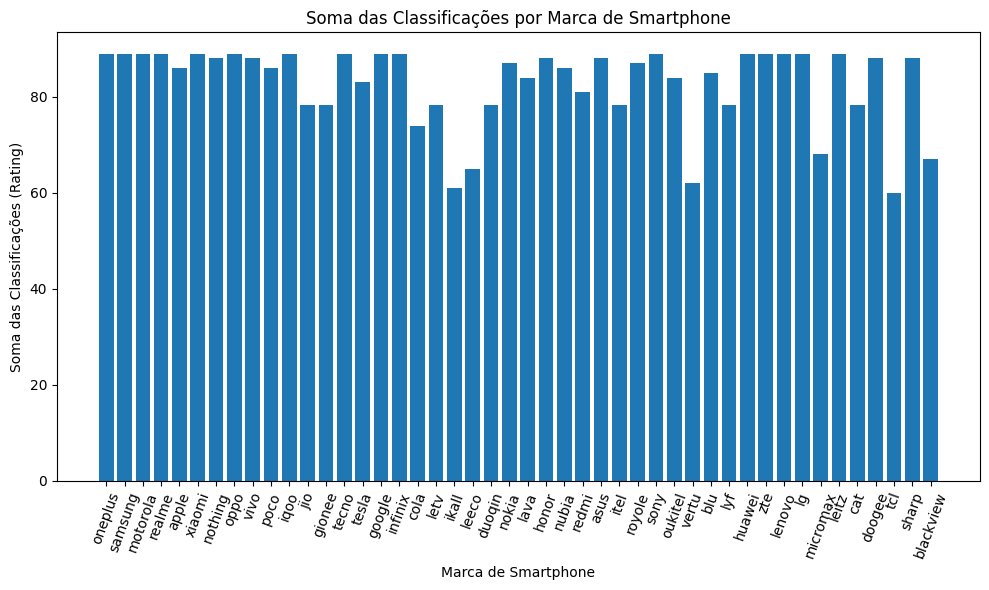

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(smartphones_df['brand_name'], smartphones_df['rating'])
plt.xlabel('Marca de Smartphone')
plt.ylabel('Soma das Classificações (Rating)')
plt.title('Soma das Classificações por Marca de Smartphone')
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

Ok, temos a nossa primeira imagem gerada. Aqui podemos ver que a grande maioria das marcas de smartphones tem notas acima da media.
Exitem 3 empresas que estão abaixo comparadas as momas das notas de outras marcas que são ikall, vertu e a tcl.

3. Falando nelas, vamos ver quais são as marcas em que a soma é menor, justamente o contrario da outra query.

```sql
SELECT brand_name, SUM(rating) AS rating_brand
FROM smartphones
GROUP BY brand_name
ORDER BY rating_brand ASC;

![query3](https://github.com/Jacksonvieira431/Smartphones-data-analytics-in-sql/blob/main/querys/query3.png?raw=true)

Aqui podemos ver que as menores do mercado de fato é a tcl (com a menor nota), vertu e lecco.
é enteressante se notar que a ikall nessa query foi para 17º posição o que indica que a empresa tem mais aparelhos que as demais com menor nota.

Ok, mais vamos ver o que o grafico nos mostra dessa vez.

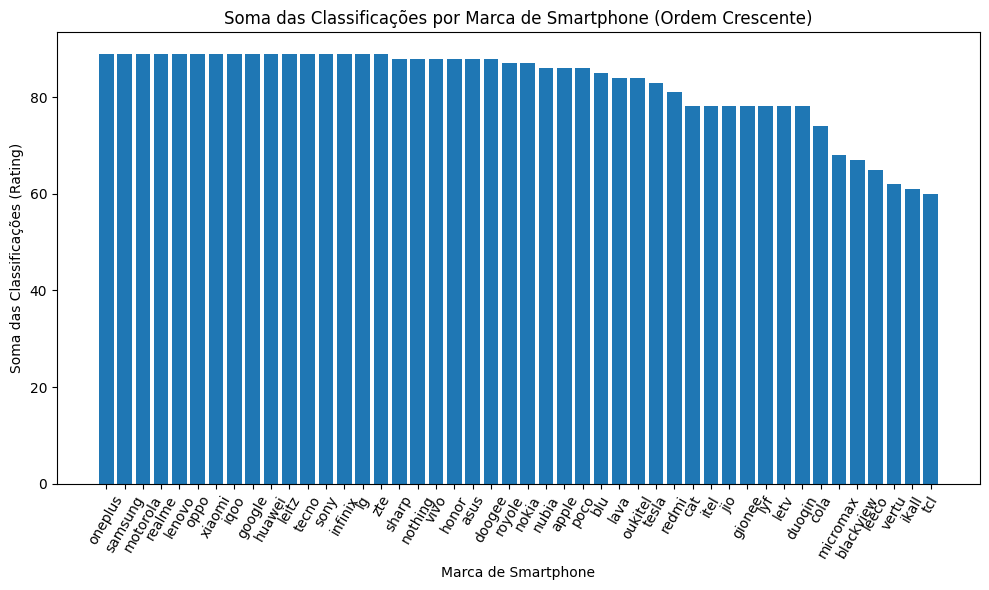

In [26]:
df = smartphones_df.sort_values(by='rating', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(df['brand_name'], df['rating'])
plt.xlabel('Marca de Smartphone')
plt.ylabel('Soma das Classificações (Rating)')
plt.title('Soma das Classificações por Marca de Smartphone (Ordem Crescente)')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

Agora, podemos confirmar que temos a lista completa ordenada do menor para o maior (ou vice-versa). e de fato nos temos a confirmação do que vimos anteriormente.

4. Certo mais o melhor mesmo para temos uma dimenção real da qualidade dos aparelhos temos que observar a media. Vamos fazer uma query para analisar isso com mais acertividade.

```sql
SELECT brand_name, AVG(rating) AS avg_rating
FROM smartphones
GROUP BY brand_name
ORDER BY avg_rating DESC;

![query4](https://github.com/Jacksonvieira431/Smartphones-data-analytics-in-sql/blob/main/querys/query4.png?raw=true)

Para quem achou que iamos encontrar apenas Apple, Samsung e Xiaomi está enganado. A lista tem em primeiro lugar a leitz com 89.0 pontos, em seguida lenovo, sharp e porai vai
Tambem podemos observar que a Apple nem se quer aparece no grafico, isso quer dizer que todas as empresas mostradas nessa query tem notas maiores que a gigante. Temos xiaomi, lg, huawei, motorola, blu, tesla, asus e sony.

Ok, essa foi uma analise interessante mais como ficaria isso num grafico?

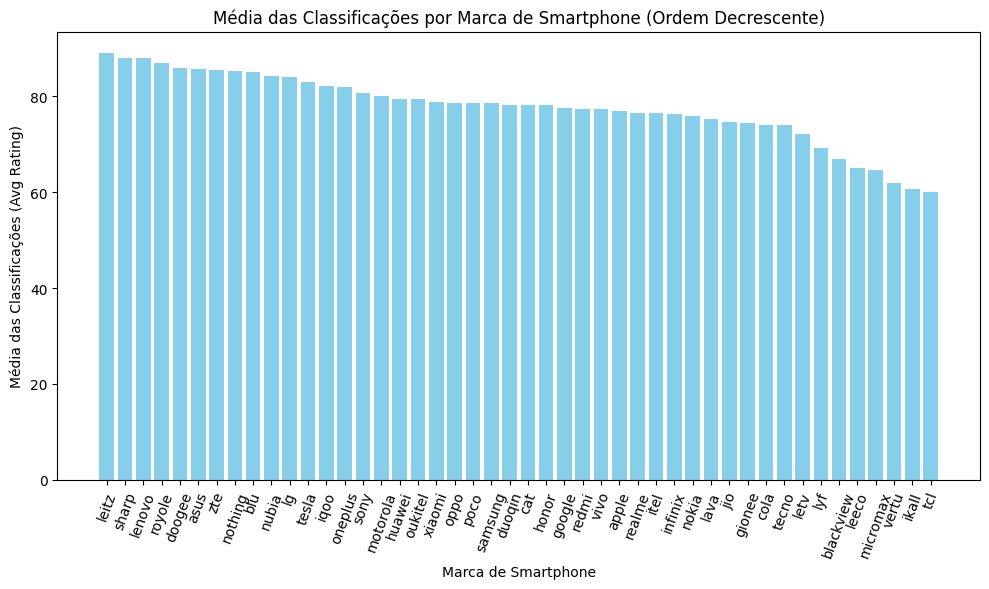

In [27]:
avg_ratings = df.groupby('brand_name')['rating'].mean().reset_index()

avg_ratings = avg_ratings.sort_values(by='rating', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(avg_ratings['brand_name'], avg_ratings['rating'], color='skyblue')
plt.xlabel('Marca de Smartphone')
plt.ylabel('Média das Classificações (Avg Rating)')
plt.title('Média das Classificações por Marca de Smartphone (Ordem Decrescente)')
plt.xticks(rotation=70)

plt.tight_layout()
plt.show()

Agora sim podemos analisar de uma forma mais ampla, aqui temos a media de todas as marcas do maior para o menor. Podemos ver de cara que a query anterior procede totalmente com o que está sendo mostrado aqui.
e podemos ver a posição da Apple, e a visiança de qualidade da apple são as marcas vivo, google e realme praticamente na mesma faixa de notas.

5. Certo, vamos mais a fundo agora! Quais são as marcas que mais estão investindo na tecnologia do 5g?

```sql
SELECT brand_name, COUNT(*) AS num_5g_devices
FROM smartphones
WHERE has_5g = true
GROUP BY brand_name
ORDER BY num_5g_devices DESC;

![query5](https://github.com/Jacksonvieira431/Smartphones-data-analytics-in-sql/blob/main/querys/query5.png?raw=true)

É óbvio que a Xiaomi e a Samsung ocupariam as primeiras posições, mas o que chamou a atenção foi a presença surpreendente da Oppo em terceiro lugar, seguida pela Vivo e, em seguida, a Realme. São empresas que talvez não tenham a mesma visibilidade das gigantes tradicionais, como a Sony, por exemplo, mas este gráfico demonstra seu compromisso em crescer e competir no mercado 5G. Elas estão investindo quase 9 vezes mais do que a Sony, e estão à frente de empresas como Google, Nokia, Asus, Honor, Poco e OnePlus, que já são bem estabelecidas no setor.

Depois disso precisamos ver o grafico para analisar isso!

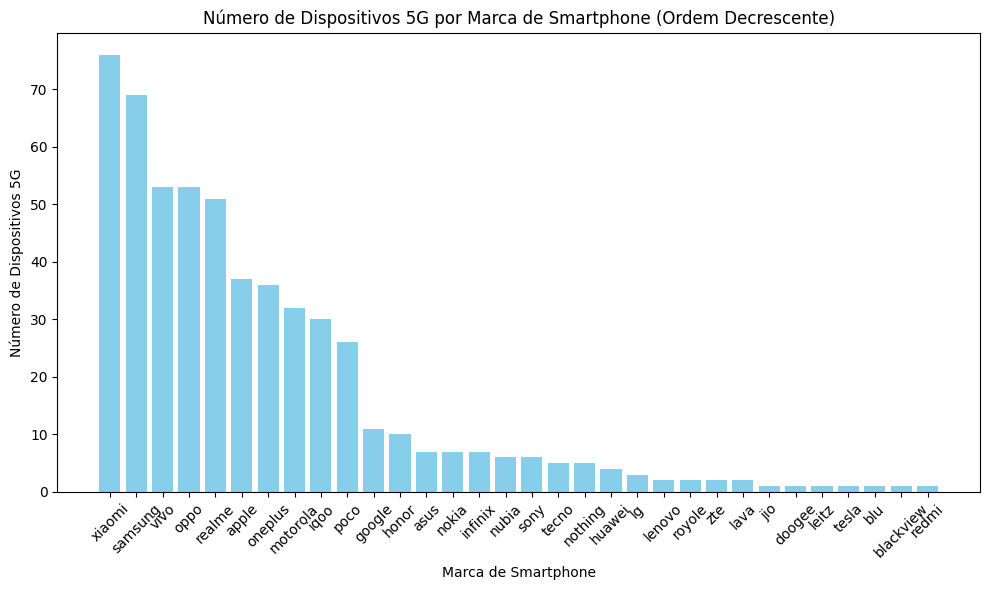

In [28]:
num_5g_devices = df[df['has_5g'] == True].groupby('brand_name')['has_5g'].count().reset_index()
num_5g_devices = num_5g_devices.rename(columns={'has_5g': 'num_5g_devices'})

num_5g_devices = num_5g_devices.sort_values(by='num_5g_devices', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(num_5g_devices['brand_name'], num_5g_devices['num_5g_devices'], color='skyblue')
plt.xlabel('Marca de Smartphone')
plt.ylabel('Número de Dispositivos 5G')
plt.title('Número de Dispositivos 5G por Marca de Smartphone (Ordem Decrescente)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Agora podemos ter uma dimensão real do que os numeros nos mostra! Aqui podemos ver claramente quais são as empresas que realmente estão investindo no futuro

6. Quais são as marcas que mais investem em armazenamento e memoria RAM?

```sql
SELECT brand_name, AVG(ram_capacity) AS avg_ram, AVG(internal_memory) AS avg_internal_memory
FROM smartphones
GROUP BY brand_name
ORDER BY avg_ram DESC, avg_internal_memory DESC;

![query6](https://github.com/Jacksonvieira431/Smartphones-data-analytics-in-sql/blob/main/querys/query6.png?raw=true)

Aqui temos algo curioso, a Testa do empresario Elon Musk, lidera por que a empresa tem apenas um aparelho, e justamente ele tem 512GB de Armazenamento e 16GB de Memoria RAM (O que provavelmente já é melhor que o seu computador).
Novamente a Apple não aparece aqui, a Xiaomi e a Samsung tambem não.

Vamos ver onde elas estão?!

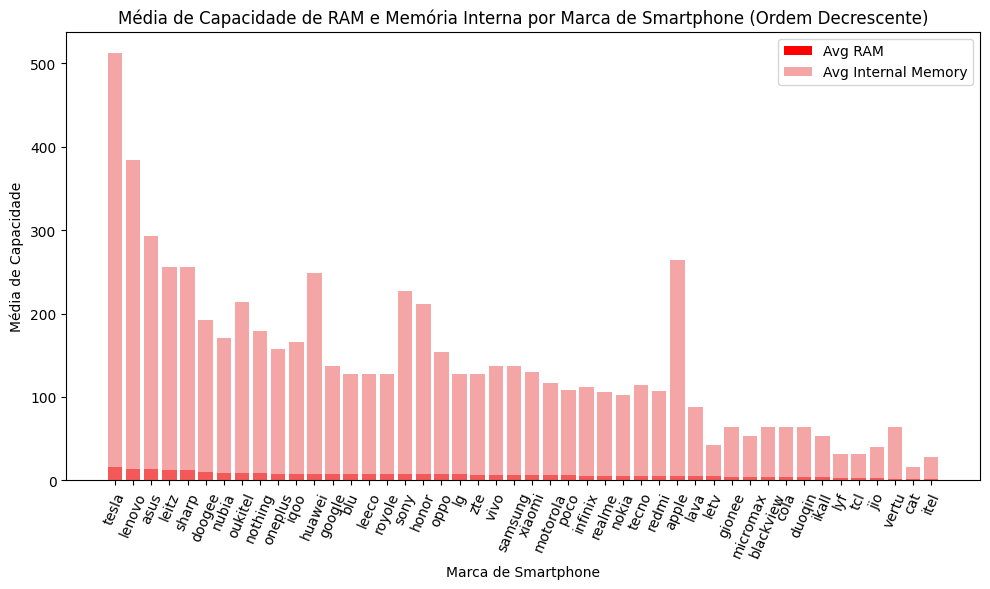

In [29]:
avg_ram_internal = df.groupby('brand_name').agg({'ram_capacity': 'mean', 'internal_memory': 'mean'}).reset_index()
avg_ram_internal = avg_ram_internal.rename(columns={'ram_capacity': 'avg_ram', 'internal_memory': 'avg_internal_memory'})

avg_ram_internal = avg_ram_internal.sort_values(by=['avg_ram', 'avg_internal_memory'], ascending=[False, False])

plt.figure(figsize=(10, 6))
plt.bar(avg_ram_internal['brand_name'], avg_ram_internal['avg_ram'], color='red', label='Avg RAM')
plt.bar(avg_ram_internal['brand_name'], avg_ram_internal['avg_internal_memory'], color='lightcoral', label='Avg Internal Memory', alpha=0.7)
plt.xlabel('Marca de Smartphone')
plt.ylabel('Média de Capacidade')
plt.title('Média de Capacidade de RAM e Memória Interna por Marca de Smartphone (Ordem Decrescente)')
plt.xticks(rotation=67)
plt.legend()

plt.tight_layout()
plt.show()

A Apple aqui está mais atraz provavelmente por causa da memoria RAM, que em se tratando de iphone não são das melhores

7. Ok, mais quais são as empresas que tem mais de 5 aparelhos com o 5G com as melhores notas? Acho isso bem interessante analisar, por que não adianta investir pesado em 5G se o celular em si não é interessante no geral!

```sql
SELECT brand_name, AVG(rating) AS avg_rating, COUNT(*) AS num_5g_devices
FROM smartphones
WHERE has_5g = true
GROUP BY brand_name
HAVING COUNT(*) >= 5
ORDER BY avg_rating DESC;

![query7](https://github.com/Jacksonvieira431/Smartphones-data-analytics-in-sql/blob/main/querys/query7.png?raw=true)

Das empresas que mais tem aparelhos 5G e que tem as melhores notas temos aqui algo que pessoalmente não esperava, Motorola é a empresa que mais investe em 5g com as melhores notas, em seguida a oneplus (que pra mim não é surpresa), xiaomi e samsung com boas notas mesmo com a quantidade de aparelhos, e finalmente a Apple não está entre as 18 melhores de acordo com os requisitos da query

Vamos ver isso em grafico!

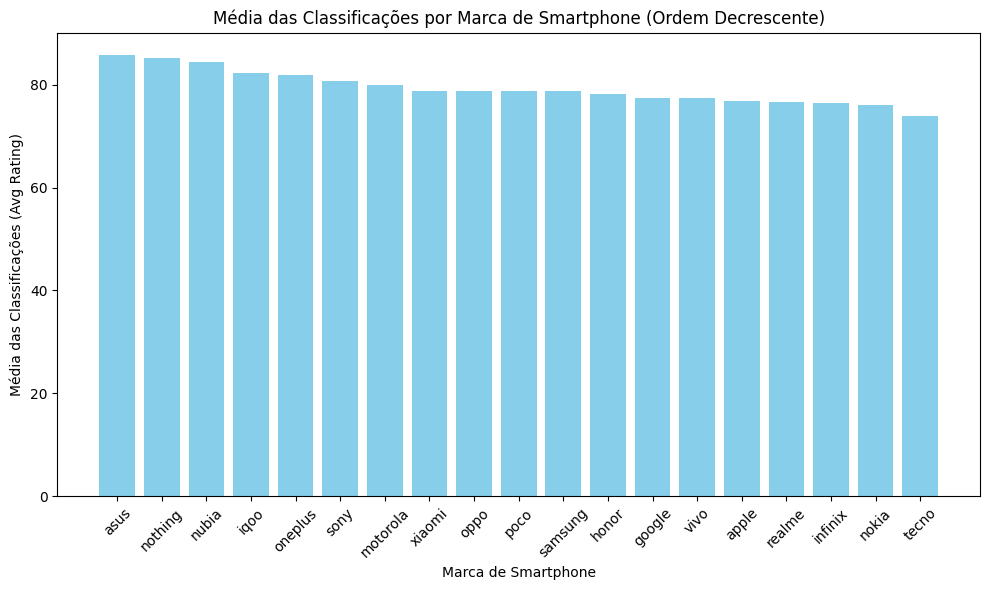

In [30]:
brand_counts = df[df['has_5g'] == True]['brand_name'].value_counts()
brands_with_5g = brand_counts[brand_counts >= 5].index.tolist()

filtered_df = df[df['brand_name'].isin(brands_with_5g)]
avg_ratings = filtered_df.groupby('brand_name')['rating'].mean().reset_index()
avg_ratings = avg_ratings.sort_values(by='rating', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(avg_ratings['brand_name'], avg_ratings['rating'], color='skyblue')
plt.xlabel('Marca de Smartphone')
plt.ylabel('Média das Classificações (Avg Rating)')
plt.title('Média das Classificações por Marca de Smartphone (Ordem Decrescente)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Uma coisa interessante para analisar é a questão de bateria e tempo de recarga! Muita gente ao pesquisar sobre um novo celular presta bastante atenção nisso, sendo um dos requisitos principais nas pesquisas dos consumidores

8. Quais são os modelos com as maiores baterias com fast charging?

```sql
SELECT brand_name, model, battery_capacity, fast_charging
FROM smartphones
WHERE battery_capacity >= 4000 AND fast_charging_available = 1
ORDER BY battery_capacity DESC;

![query8](https://github.com/Jacksonvieira431/Smartphones-data-analytics-in-sql/blob/main/querys/query8.png?raw=true)

Aqui, é evidente que dois gigantes se destacam pelo tamanho da bateria. O Doogee V Max lidera com incríveis 22.000 mAh, combinados com um carregador de 33W de potência. No entanto, apesar de sua capacidade impressionante de bateria, esses modelos não lideram quando se trata de velocidade de carregamento. Nesse aspecto, destacam-se os modelos da série Rog Phone 7 (e os demais Rog Phones) com impressionantes 120W de potência, quase três vezes mais rápidos do que os primeiros da lista. Outro destaque nesse quesito é o Nubia Red Magic 8 Pro 5G, com uma potência de 80W.

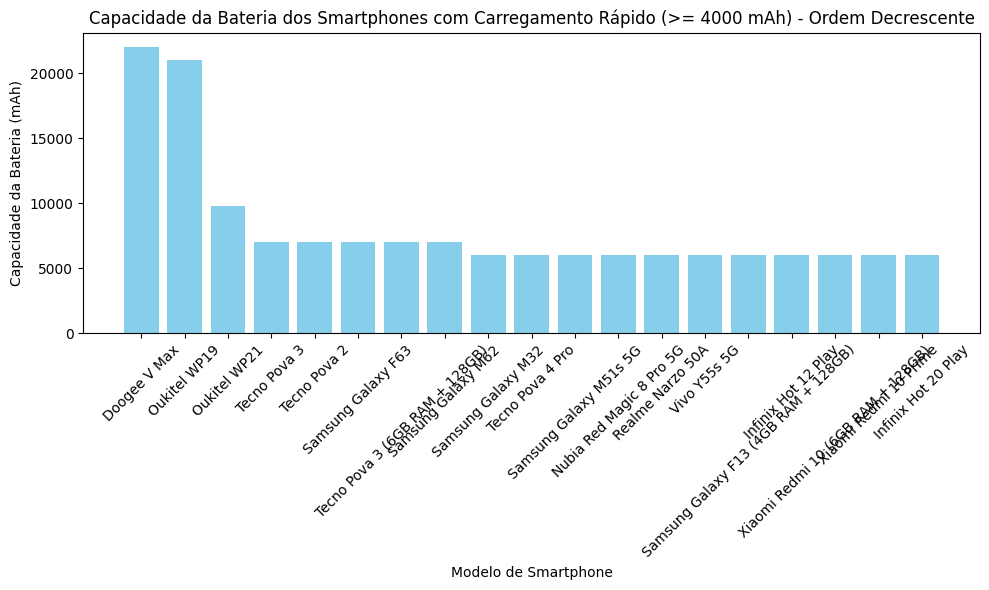

In [31]:
filtered_df = smartphones_df[(smartphones_df['battery_capacity'] >= 4000) & (smartphones_df['fast_charging_available'] == 1)]
filtered_df = filtered_df.sort_values(by='battery_capacity', ascending=False)
top_19_models = filtered_df['model'].head(19)
filtered_df = filtered_df[filtered_df['model'].isin(top_19_models)]

plt.figure(figsize=(10, 6))
plt.bar(filtered_df['model'], filtered_df['battery_capacity'], color='skyblue')
plt.xlabel('Modelo de Smartphone')
plt.ylabel('Capacidade da Bateria (mAh)')
plt.title('Capacidade da Bateria dos Smartphones com Carregamento Rápido (>= 4000 mAh) - Ordem Decrescente')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Aqui podemos ver claramente a diferença em mAh dos 2 primeiros em relação a "Normalidade" do restante dos modelos

9. e as cameras? Vamos ver brevemente os aparelhos que tem mais de 1 camera tanto frontal quanto traseira!

```sql
SELECT brand_name, model, num_rear_cameras, num_front_cameras
FROM smartphones
WHERE num_rear_cameras > 1 AND num_front_cameras > 1
ORDER BY brand_name, model;

![query9](https://github.com/Jacksonvieira431/Smartphones-data-analytics-in-sql/blob/main/querys/query9.png?raw=true)

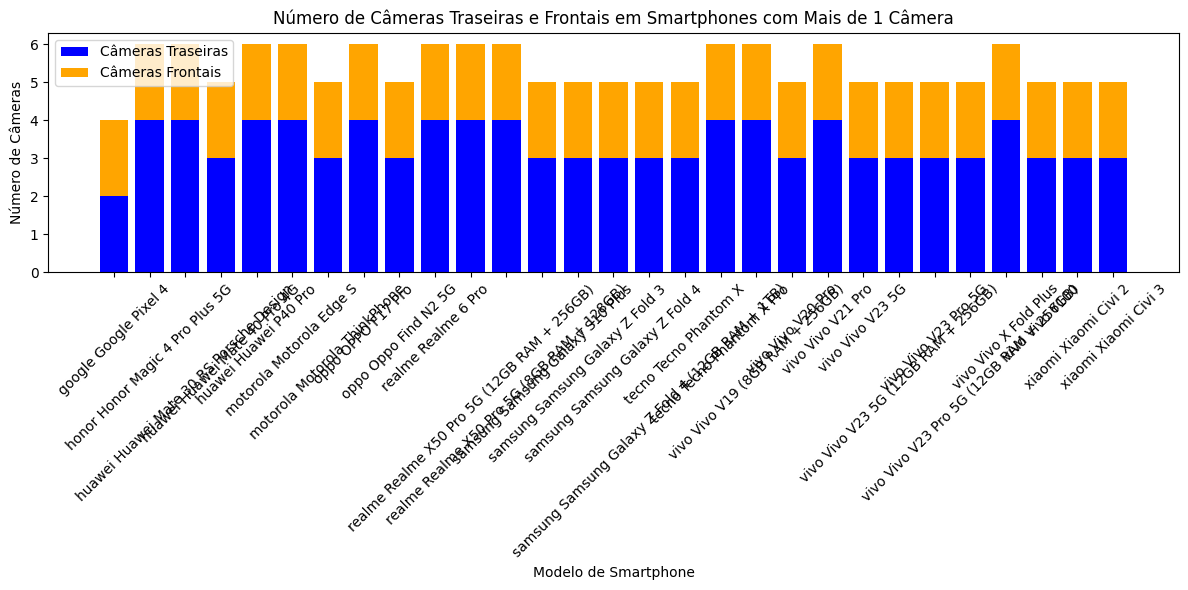

In [30]:
filtered_df = smartphones_df[(smartphones_df['num_rear_cameras'] > 1) & (smartphones_df['num_front_cameras'] > 1)]

filtered_df = filtered_df.sort_values(by=['brand_name', 'model'])

plt.figure(figsize=(12, 6))
plt.bar(filtered_df['brand_name'] + ' ' + filtered_df['model'], filtered_df['num_rear_cameras'], color='blue', label='Câmeras Traseiras')
plt.bar(filtered_df['brand_name'] + ' ' + filtered_df['model'], filtered_df['num_front_cameras'], color='orange', label='Câmeras Frontais', bottom=filtered_df['num_rear_cameras'])
plt.xlabel('Modelo de Smartphone')
plt.ylabel('Número de Câmeras')
plt.title('Número de Câmeras Traseiras e Frontais em Smartphones com Mais de 1 Câmera')
plt.xticks(rotation=45)
plt.legend()

# Exiba o gráfico
plt.tight_layout()
plt.show()

10. Quais são as marcas que mais usam a marca lider no mercado de processadores mobile "Snapdragon"?

```sql
SELECT processor_brand, brand_name, COUNT(*) AS num_qualcomm_devices
FROM smartphones
WHERE processor_brand = 'snapdragon'
GROUP BY processor_brand, brand_name
HAVING COUNT(*) >= 5
ORDER BY num_qualcomm_devices DESC;

![query10](https://github.com/Jacksonvieira431/Smartphones-data-analytics-in-sql/blob/main/querys/query10.png?raw=true)

Aqui podemos ver os mariores clientes da snapdragon! Xiaomi lidera com folga nesse quesito, apesar da Samsung ter a mediatek como marca propria ela ainda sim ultiliza bastante em seus aparelhos a snapdragon como processador.

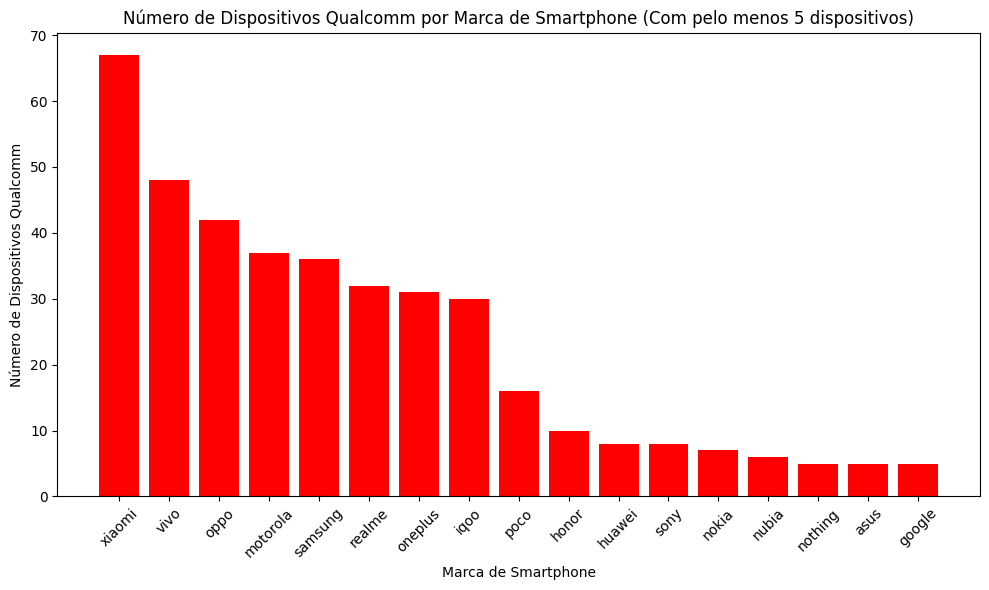

In [32]:
filtered_df = smartphones_df[smartphones_df['processor_brand'] == 'snapdragon']

qualcomm_device_counts = filtered_df['brand_name'].value_counts()

qualcomm_device_counts = qualcomm_device_counts[qualcomm_device_counts >= 5]

qualcomm_device_counts = qualcomm_device_counts.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(qualcomm_device_counts.index, qualcomm_device_counts.values, color='red')
plt.xlabel('Marca de Smartphone')
plt.ylabel('Número de Dispositivos Qualcomm')
plt.title('Número de Dispositivos Qualcomm por Marca de Smartphone (Com pelo menos 5 dispositivos)')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

11. Agora os fãs da Apple vão ficar felizes! Quais são os modelos em que processadores são os mais rapidos?

```sql
SELECT brand_name, model, processor_speed
FROM smartphones
ORDER BY processor_speed DESC;

![query11](https://github.com/Jacksonvieira431/Smartphones-data-analytics-in-sql/blob/main/querys/query11.png?raw=true)

Aqui podemos ver que o dominio da Apple nesse quesito é absoluto e indiscutivel. A empresa fabrica os melhores processadores mobiles!

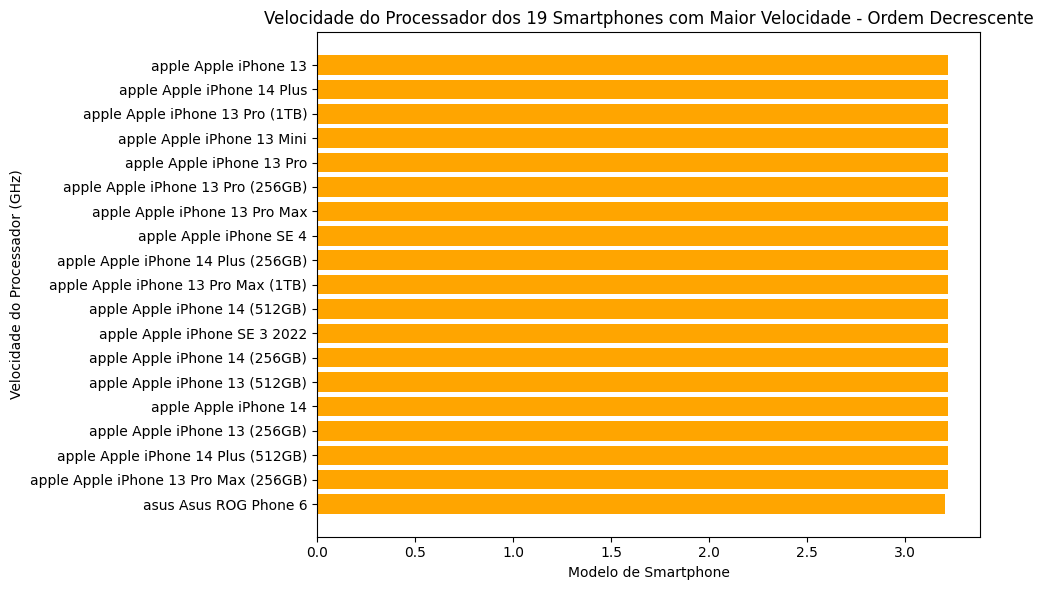

In [34]:
sorted_df = smartphones_df.sort_values(by='processor_speed', ascending=False)
top_19_models = sorted_df['model'].head(19)
filtered_df = sorted_df[sorted_df['model'].isin(top_19_models)]

plt.figure(figsize=(10, 6))
plt.barh(filtered_df['brand_name'] + ' ' + filtered_df['model'], filtered_df['processor_speed'], color='orange')
plt.xlabel('Modelo de Smartphone')
plt.ylabel('Velocidade do Processador (GHz)')
plt.title('Velocidade do Processador dos 19 Smartphones com Maior Velocidade - Ordem Decrescente')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

12. E por ultimos podemos dar uma olhadinhas nos aparelhos com as menores resoluções de tela do mercado.

```sql
SELECT brand_name, model, resolution_width, resolution_height
FROM smartphones
ORDER BY resolution_width DESC, resolution_height DESC;

![query12](https://github.com/Jacksonvieira431/Smartphones-data-analytics-in-sql/blob/main/querys/query12.png?raw=true)

Que curiosamente os 3 primeiros são 3 aparelhos da itel (nunca ouvi falar), o curioso é que em alguns deles tem o nome PRO, mais tudo bem pode apenas ser uma estrategia de marketing desconhecida.

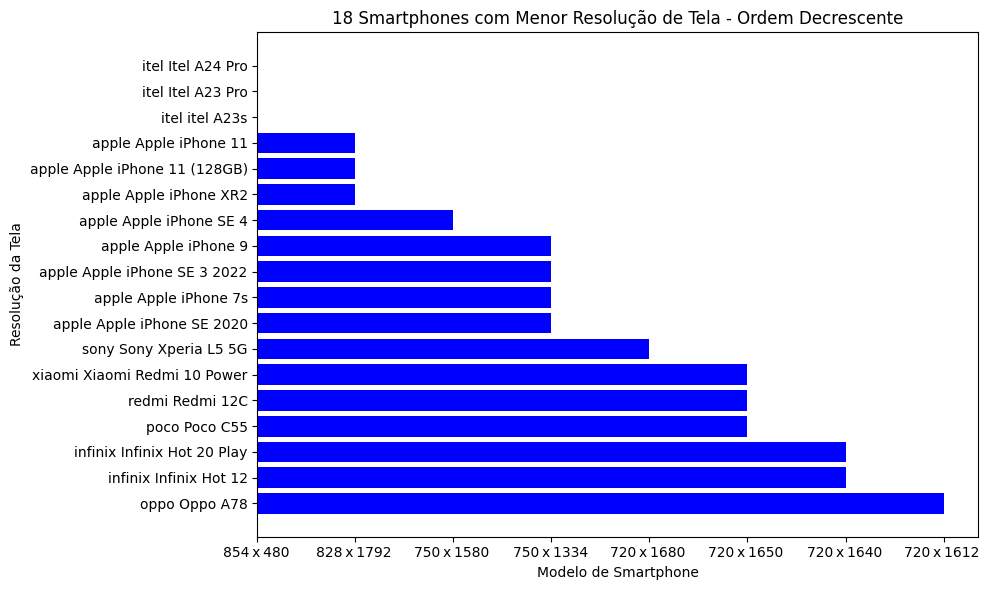

In [39]:
sorted_df = smartphones_df.sort_values(by=['resolution_width', 'resolution_height'], ascending=[False, False])

top_18_smartphones = sorted_df.head(18)

plt.figure(figsize=(10, 6))
plt.barh(top_18_smartphones['brand_name'] + ' ' + top_18_smartphones['model'], [f"{w}x{h}" for w, h in zip(top_18_smartphones['resolution_width'], top_18_smartphones['resolution_height'])], color='blue')
plt.xlabel('Modelo de Smartphone')
plt.ylabel('Resolução da Tela')
plt.title('18 Smartphones com Menor Resolução de Tela - Ordem Decrescente')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Se você chegou ate o final desse arquivo sinta-se a vontade para entrar em contato comigo para uma pesquisa em algo da sua realidade ou da realidade da sua empresa.
[Este é o meu Linkedin](https://www.linkedin.com/in/jackson-vieira/)
Te aguardo lá!